Neutron probes are instruments used in agricultural and hydrological research for measuring rootzone soil moisture. Neutron probes work by emitting fast neutrons (typically using a combination of Americum-241 and Beryllium) into the soil, which then collide with hydrogen atoms predominantly found in water molecules and lose much of their energy through these collisions. Thus, the intensity of fast neutrons is inversely correlated to the soil's moisture content. Neutron probes consist of a sealed probe that contains the radioactive source, and a neutron detector for reading the neutron flux. For field operation, neutron probes require the installation of access tubes for the probe to be dropped into the soil at various depths.

Neutron probes are highly accurate, but they need to be calibrated for specific soil types. This calibration consists of comparing neutron counts with known measurements of volumetric water content. This exercise will demosntrate how to fit a linear model to a neutron probe calibration dataset.


In [43]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [44]:
# Read dataset
df = pd.read_csv("../datasets/neutron_probe_calibration.csv")
df.head(3)


,calibration,core,top_depth,bottom_depth,vwc,count_ratio
0,Dry,1,30,60,0.279,1.63
1,Dry,1,60,90,0.259,1.54
2,Dry,1,90,120,0.265,1.46


In [52]:
# Extract columns into variables for easier notation
vwc_obs = df['vwc']
count_ratio_obs = df['count_ratio']

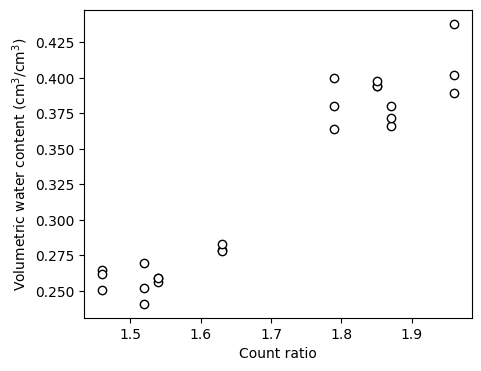

In [53]:
# Inspect data
plt.figure(figsize=(5,4))
plt.scatter(count_ratio_obs, vwc_obs, facecolor='w', edgecolor='k')
plt.xlabel("Count ratio")
plt.ylabel("Volumetric water content (cm$^3$/cm$^3$)")
plt.show()


In [59]:
# Fit linear model and get optimized slope and intercept
slope, intercept, rvalue, pvalue, sterr = linregress(count_ratio_obs, vwc_obs)
r_squared = rvalue**2
print(f"R-squared: {r_squared:.3f}")


R-squared: 0.915


In [49]:
# Use optimized model to create line 
count_ratio_line = np.linspace(1.2, 2.2)
vwc_line = intercept + slope * count_ratio_line


In [55]:
# Compute root mean squared error (RMSE)
vwc_pred = intercept + slope * count_ratio_obs
RMSE = np.sqrt(np.nanmean((vwc_pred - vwc_obs)**2))
print(round(RMSE,3), "cm^3/cm^3")


0.019 cm^3/cm^3


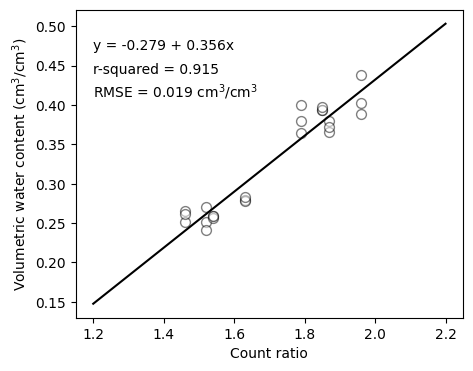

In [62]:
# Create figure with regression line
plt.figure(figsize=(5,4))
plt.scatter(count_ratio_obs, vwc_obs, s=50, facecolor='w', alpha=0.5, edgecolor='k')
plt.plot(count_ratio_line, vwc_line, '-k')
plt.xlabel("Count ratio")
plt.ylabel("Volumetric water content (cm$^3$/cm$^3$)")
plt.annotate(f"y = {intercept:.3f} + {slope:.3f}x", (1.2, 0.47))
plt.annotate(f"r-squared = {r_squared:.3f}", (1.2, 0.44))
plt.annotate(f"RMSE = {RMSE:.3f} cm$^3$/cm$^3$", (1.2, 0.41))
plt.show()


## References

Evett, S.R., Tolk, J.A. and Howell, T.A., 2003. A depth control stand for improved accuracy with the neutron probe. Vadose Zone Journal, 2(4), pp.642-649.

Patrignani, A., Godsey, C.B., Ochsner, T.E. and Edwards, J.T., 2012. Soil water dynamics of conventional and no-till wheat in the Southern Great Plains. Soil Science Society of America Journal, 76(5), pp.1768-1775.

Patrignani, A., Godsey, C.B. and Ochsner, T.E., 2019. No-Till Diversified Cropping Systems for Efficient Allocation of Precipitation in the Southern Great Plains. Agrosystems, Geosciences & Environment, 2(1).